In [37]:
import pandas as pd
import numpy as np

# Correlation

In [38]:
Location = "datasets/datasets/gradedata.csv"
df = pd.read_csv(Location)

df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [39]:
df.corr()

,age,exercise,hours,grade
age,1.000000,-0.003643,-0.017467,-0.007580
exercise,-0.003643,1.000000,0.021105,0.161286
hours,-0.017467,0.021105,1.000000,0.801955
grade,-0.007580,0.161286,0.801955,1.000000


# Linear Regression

In [40]:
import statsmodels.formula.api as smf

In [41]:
result = smf.ols('grade ~ age + exercise + hours', data=df).fit()

In [71]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     155.3
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.02e-16
Time:                        15:54:49   Log-Likelihood:                -12.406
No. Observations:                  30   AIC:                             32.81
Df Residuals:                      26   BIC:                             38.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6916      0.319     14.693      0.000       4.035       5.348
employees      0.0004      0.000      1.369      0.183      -0.000       0.001
sales         -0.0106      0.001     -8.003      0.000      -0.013      -0.008
location      -0.0139      0.009     -1.587      0.125      -0.032       0.004
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   2.411
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.646
Skew:                          -0.022   Prob(JB):                        0.724
Kurtosis:                       2.282   Cond. No.                     9.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With age, exercise, and hours being 0, your starting grade is likely to be around 57.87

In [43]:
#remove age from regression, not very correlated
result = smf.ols('grade ~ exercise + hours', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1973.
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:05:16   Log-Likelihood:                -6300.8
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1997   BIC:                         1.262e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5316      0.447    130.828      0.000      57.654      59.409
exercise       0.9892      0.089     11.131      0.000       0.815       1.163
hours          1.9162      0.031     61.575      0.000       1.855       1.977
==============================================================================
Omnibus:                      318.721   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2158.000
Skew:                          -0.564   Prob(JB):                         0.00
Kurtosis:                       7.962   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#set coefficient to 0
result = smf.ols(formula='grade ~ age + exercise + hours - 1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.284e+04
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:05:16   Log-Likelihood:                -6974.3
No. Observations:                2000   AIC:                         1.395e+04
Df Residuals:                    1997   BIC:                         1.397e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            3.1129      0.035     88.030      0.000       3.044       3.182
exercise       1.7659      0.122     14.482      0.000       1.527       2.005
hours          2.2860      0.042     54.486      0.000       2.204       2.368
==============================================================================
Omnibus:                      131.221   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.367
Skew:                          -0.301   Prob(JB):                     2.57e-88
Kurtosis:                       5.116   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Your Turn

Run a correlation and regresssion on the dataset below. What can you tell from the data?

In [45]:
Location = "datasets/datasets/tamiami.csv"

df = pd.read_csv(Location)
df.head()

,Cart Location,Hot Dog Sales,Employees in Nearby Office Buildings,Num of Nearby Restaurants,Num of Other Food Carts Nearby,Price
0,1,100,1600,8,12,4.16
1,2,80,1200,6,13,4.63
2,3,450,2800,19,6,0.50
3,4,580,4300,19,2,0.47
4,5,100,1400,6,13,4.24


In [46]:
columns = ['location', 'sales', 'employees', 'restaurants', 'foodcarts', 'price']

#change column names for readability
df.columns = columns
df.head()

,location,sales,employees,restaurants,foodcarts,price
0,1,100,1600,8,12,4.16
1,2,80,1200,6,13,4.63
2,3,450,2800,19,6,0.50
3,4,580,4300,19,2,0.47
4,5,100,1400,6,13,4.24


In [47]:
df.corr()

,location,sales,employees,restaurants,foodcarts,price
location,1.000000,0.042705,-0.068923,0.049701,0.077219,-0.138444
sales,0.042705,1.000000,0.943238,0.913674,-0.919762,-0.966378
employees,-0.068923,0.943238,1.000000,0.856976,-0.874692,-0.881540
restaurants,0.049701,0.913674,0.856976,1.000000,-0.761793,-0.933951
foodcarts,0.077219,-0.919762,-0.874692,-0.761793,1.000000,0.860154
price,-0.138444,-0.966378,-0.881540,-0.933951,0.860154,1.000000


In [48]:
#from regression, not very correlated yaxis ~ xaxis_1 +xaxis_2 +xaxis_3
result = smf.ols('price ~ restaurants + sales + location + employees +foodcarts', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     121.7
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           3.05e-16
Time:                        15:05:17   Log-Likelihood:                -7.4344
No. Observations:                  30   AIC:                             26.87
Df Residuals:                      24   BIC:                             35.28
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.9407      0.656      7.527      0.000       3.586       6.295
restaurants    -0.1018      0.036     -2.810      0.010      -0.177      -0.027
sales          -0.0074      0.002     -3.398      0.002      -0.012      -0.003
location       -0.0146      0.008     -1.775      0.089      -0.032       0.002
employees       0.0003      0.000      1.433      0.165      -0.000       0.001
foodcarts       0.0166      0.045      0.367      0.717      -0.077       0.110
==============================================================================
Omnibus:                        1.035   Durbin-Watson:                   2.551
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.946
Skew:                          -0.396   Prob(JB):                        0.623
Kurtosis:                       2.641   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#remove foodcarts from regression, not very correlated
result = smf.ols('price ~ restaurants + sales + location + employees ', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     157.6
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           2.42e-17
Time:                        15:05:17   Log-Likelihood:                -7.5183
No. Observations:                  30   AIC:                             25.04
Df Residuals:                      25   BIC:                             32.04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.1510      0.314     16.416      0.000       4.505       5.797
restaurants    -0.0951      0.031     -3.103      0.005      -0.158      -0.032
sales          -0.0080      0.001     -5.612      0.000      -0.011      -0.005
location       -0.0136      0.008     -1.783      0.087      -0.029       0.002
employees       0.0003      0.000      1.490      0.149      -0.000       0.001
==============================================================================
Omnibus:                        0.865   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.895
Skew:                          -0.339   Prob(JB):                        0.639
Kurtosis:                       2.493   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#remove foodcarts from regression, not very correlated
result = smf.ols('price ~ employees + sales + location + employees ', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     155.3
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.02e-16
Time:                        15:05:17   Log-Likelihood:                -12.406
No. Observations:                  30   AIC:                             32.81
Df Residuals:                      26   BIC:                             38.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6916      0.319     14.693      0.000       4.035       5.348
employees      0.0004      0.000      1.369      0.183      -0.000       0.001
sales         -0.0106      0.001     -8.003      0.000      -0.013      -0.008
location      -0.0139      0.009     -1.587      0.125      -0.032       0.004
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   2.411
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.646
Skew:                          -0.022   Prob(JB):                        0.724
Kurtosis:                       2.282   Cond. No.                     9.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid') #my default is "whitegrid"

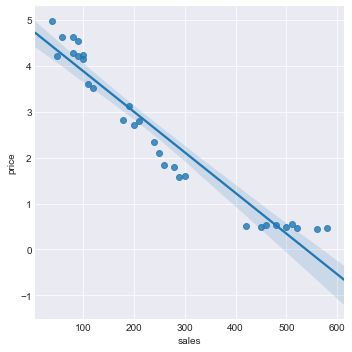

In [52]:
#make a scatterplot
sns.lmplot(x='sales', y='price', data=df)

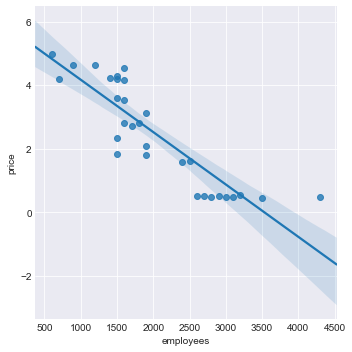

In [57]:
#make a scatterplot
sns.lmplot(x='employees', y='price', data=df)

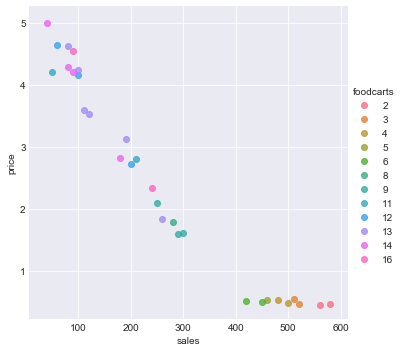

In [63]:
#add more details to scatterplot
sns.lmplot(x='sales', y='price', data=df, 
           fit_reg=False, #remove regression line
           hue='foodcarts')   #color by evolution stage

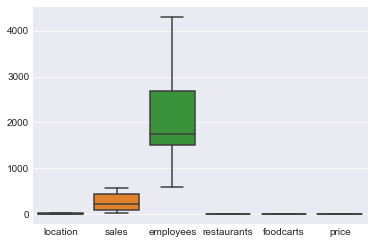

In [54]:
#boxplot showing stats for each characteristic
sns.boxplot(data=df)

In [64]:
#create a dataframe containing the stats for each Pokemon
#drop Total, Stage, and Legendary
stats_df = df.drop(['location', 'restaurants', 'foodcarts','price'], axis=1)
stats_df.head()

,sales,employees
0,100,1600
1,80,1200
2,450,2800
3,580,4300
4,100,1400


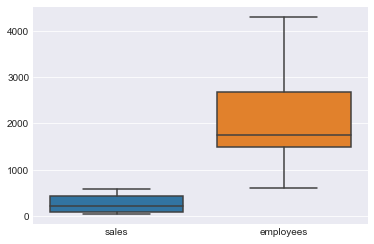

In [65]:
#boxplot for stats
sns.boxplot(data=stats_df)

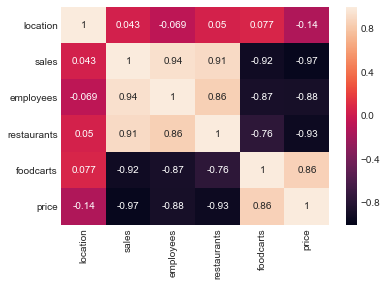

In [56]:
#show correlation of stats via heatmap
#stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)